### IMPORTING ALL REQUIRE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import random
plt.style.use('Solarize_Light2')

from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

C:\Users\shrey\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### IMPORTING DATASETS

In [2]:
df1 = pd.read_excel("Data/case_study1.xlsx")
df2 = pd.read_excel("Data/case_study2.xlsx")

In [3]:
pd.set_option("display.max_columns", None)
plt.style.use('bmh')

def add_bar_labels(ax):
    #ax = plt.gca()
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2., i.get_height(), 
                '%d' % int(i.get_height()), fontsize=10,
                ha="center", va='bottom')

### HIGH-LEVEL SUMMARY OF DATA

#### CASE-STUDY1 DATASET

In [4]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


In [5]:
# # FEATURE DESCRIPTION :-     
    
# Case_study1 table
# Variable Name                Description

# Total_TL                     Total trade lines/accounts in Bureau
# Tot_Closed_TL                Total closed trade lines/accounts
# Tot_Active_TL                Total active accounts
# Total_TL_opened_L6M          Total accounts opened in last 6 Months
# Tot_TL_closed_L6M            Total accounds closes in last 6 months
# pct_tl_open_L6M              Percent accounts opened in last 6 months
# pct_tl_closed_L6M            percent accounts closed in last 6 months
# pct_active_tl                Percent active accounts
# pct_closed_tl                Percent closed accounts
# Total_TL_opened_L12M         Total accounts opened in last 12 Months
# Tot_TL_closed_L12M           Total accounts closed in last 12 months
# pct_tl_open_L12M             Percent accounts opened in last 12 months
# pct_tl_closed_L12M           percent accounts closed in last 12 months
# Tot_Missed_Pmnt              Total missed Payments
# Auto_TL                      Count Automobile accounts
# CC_TL                        Count of Credit card accounts
# Consumer_TL                  Count of Consumer goods accounts
# Gold_TL                      Count of Gold loan accounts
# Home_TL                      Count of Housing loan accounts
# PL_TL                        Count of Personal loan accounts
# Secured_TL                   Count of secured accounts(collateral)
# Unsecured_TL                 Count of unsecured accounts
# Other_TL                     Count of other accounts
# Age_Oldest_TL                Age of oldest opened account(Month)
# Age_Newest_TL                Age of newest opened account(Month)  

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

So using the above observation, we get to know that there is a no-null value present in our data set, but while we have observed our data using Excel at that time, we get to know that in some place there is a value like -99999, which is not a real value. But this value is representing a null value because the systems don't allow users to input null, so instead of null, they have inputted it as -99999. So we need to handle all -99999 values by considering it as a null value.

<!-- So using the above observation, we get to know that there is a no-null value present in our data set, but while we have observed our data using Excel at that time, we get to know that in some place there is a value like -99999, which is not a real value. But this value is representing a null value because the systems don't allow users to input null, so instead of null, they have inputted it as -99999. So we need to handle all -99999 values by considering it as a null value. -->

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [8]:
# OBSERAVATION:-
# 1. From the data set case study-1, we observe that there are a total of 26 columns and 51,336 instances present in our data set.
# 2. Out of 26 columns, 6 columns have a datatype of float and 20 have a datatype of integer.
# 3. Our data set uses 10.2 MB of memory.

#### CASE-STUDY-2

In [9]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

### FEATURE DESCRIPTION :- 

In [11]:
# Case study2 Table :- 

#     time_since_recent_payment         Time Since recent Payment made
#     time_since_first_deliquency       Time since first Deliquency (missed payment)
#     time_since_recent_deliquency      Time Since recent Delinquency
#     num_times_delinquent              Number of times delinquent
#     max_delinquency_level             Maximum delinquency level
#     max_recent_level_of_deliq         Maximum recent level of delinquency
#     num_deliq_6mts                    Number of times delinquent in last 6 months
#     num_deliq_12mts                   Number of times delinquent in last 12 months
#     num_deliq_6_12mts                 Number of times delinquent between last 6 months and last 12 months
#     max_deliq_6mts                    Maximum delinquency level in last 6 months
#     max_deliq_12mts                   Maximum delinquency level in last 12 months
#     num_times_30p_dpd                 Number of times 30+ dpd 
#     num_times_60p_dpd                 Number of times 60+ dpd 
#     num_std                           Number of standard Payments
#     num_std_6mts                      Number of standard Payments in last 6 months
#     num_std_12mts                     Number of standard Payments in last 12 months
#     num_sub                           Number of sub standard payments - not making full payments
#     num_sub_6mts                      Number of sub standard payments in last 6 months
#     num_sub_12mts                     Number of sub standard payments in last 12 months
#     num_dbt                           Number of doubtful payments
#     num_dbt_6mts                      Number of doubtful payments in last 6 months
#     num_dbt_12mts                     Number of doubtful payments in last 12 months
#     num_lss                           Number of loss accounts 
#     num_lss_6mts                      Number of loss accounts in last 6 months
#     num_lss_12mts                     Number of loss accounts in last 12 months
#     recent_level_of_deliq             Recent level of delinquency
#     tot_enq                           Total enquiries
#     CC_enq                            Credit card enquiries
#     CC_enq_L6m                        Credit card enquiries in last 6 months
#     CC_enq_L12m                       Credit card enquiries in last 12 months
#     PL_enq                            Personal Loan enquiries
#     PL_enq_L6m                        Personal Loan enquiries in last 6 months
#     PL_enq_L12m                       Personal Loan enquiries in last 12 months
#     time_since_recent_enq             Time since recent enquiry
#     enq_L12m                          Enquiries in last 12 months
#     enq_L6m                           Enquiries in last 6 months
#     enq_L3m                           Enquiries in last 3 months
#     MARITALSTATUS                     Marital Status
#     EDUCATION                         Education level
#     AGE                               Age
#     GENDER  
#     NETMONTHLYINCOME
#     Time_With_Curr_Empr               Time with current Employer
#     pct_of_active_TLs_ever            Percent active accounts ever
#     pct_opened_TLs_L6m_of_L12m        Percent accounts opened in last 6 months to last 12 months
#     pct_currentBal_all_TL             Percent current balance of all accounts
#     CC_utilization                    Credit card utilization
#     CC_Flag                           Credit card Flag
#     PL_utilization                    Peronal Loan utilization
#     PL_Flag                           Personal Loan Flag
#     pct_PL_enq_L6m_of_L12m            Percent enquiries PL in last 6 months to last 12 months
#     pct_CC_enq_L6m_of_L12m            Percent enquiries CC in last 6 months to last 12 months
#     pct_PL_enq_L6m_of_ever            Percent enquiries PL in last 6 months to last 6 months
#     pct_CC_enq_L6m_of_ever            Percent enquiries CC in last 6 months to last 6 months
#     max_unsec_exposure_inPct          Maximum unsecured exposure in percent
#     HL_Flag                           Housing Loan Flag
#     GL_Flag                           Gold Loan Flag
#     last_prod_enq2                    Lates product enquired for
#     first_prod_enq2                   First productd enquired for
#     Credit_Score                      Applicant's credit score
#     Approved_Flag                     Priority levels    

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

### ANALYZING AND REMOVING NULL VALUES

#### DATASET-1

In [13]:
for i in df1.columns:
    if len(df1[df1[i] == -99999]) !=0:
        print(i,":-",len(df1[df1[i] == -99999]))
    

Age_Oldest_TL :- 40
Age_Newest_TL :- 40


In [14]:
df1 = df1[df1['Age_Oldest_TL'] != -99999]

In [15]:
flag = False
for i in df1.columns:
    if len(df1[df1[i] == -99999]) !=0:
        flag = True
        print(i,":-",len(df1[df1[i] == -99999]))
    
if flag == False:
    print("!! THERE IS NO NULL VALUE !!")

!! THERE IS NO NULL VALUE !!


In [16]:
df1.shape

(51296, 26)

#### DATASET-2

In [17]:
df2_temp = df2
for i in df2_temp.columns:
    if len(df2_temp[df2_temp[i] == -99999]) !=0:
        print(i,":-",len(df2_temp[df2_temp[i] == -99999]),"-----", round((len(df2_temp[df2_temp[i] == -99999])/df2_temp.shape[0])*100, 2),"%" )
    

time_since_recent_payment :- 4291 ----- 8.36 %
time_since_first_deliquency :- 35949 ----- 70.03 %
time_since_recent_deliquency :- 35949 ----- 70.03 %
max_delinquency_level :- 35949 ----- 70.03 %
max_deliq_6mts :- 12890 ----- 25.11 %
max_deliq_12mts :- 10832 ----- 21.1 %
tot_enq :- 6321 ----- 12.31 %
CC_enq :- 6321 ----- 12.31 %
CC_enq_L6m :- 6321 ----- 12.31 %
CC_enq_L12m :- 6321 ----- 12.31 %
PL_enq :- 6321 ----- 12.31 %
PL_enq_L6m :- 6321 ----- 12.31 %
PL_enq_L12m :- 6321 ----- 12.31 %
time_since_recent_enq :- 6321 ----- 12.31 %
enq_L12m :- 6321 ----- 12.31 %
enq_L6m :- 6321 ----- 12.31 %
enq_L3m :- 6321 ----- 12.31 %
pct_currentBal_all_TL :- 72 ----- 0.14 %
CC_utilization :- 47636 ----- 92.79 %
PL_utilization :- 44435 ----- 86.56 %
max_unsec_exposure_inPct :- 23178 ----- 45.15 %


In [18]:
columnsToBeRemoved = []
for i in df2_temp.columns:
    if len(df2_temp[df2_temp[i] == -99999]) != 0 and round((len(df2_temp[df2_temp[i] == -99999])/df2_temp.shape[0])*100, 2) > 30:
        print(i,":-", round((len(df2_temp[df2_temp[i] == -99999])/df2_temp.shape[0])*100, 2),"%" )
        columnsToBeRemoved.append(i)
    

time_since_first_deliquency :- 70.03 %
time_since_recent_deliquency :- 70.03 %
max_delinquency_level :- 70.03 %
CC_utilization :- 92.79 %
PL_utilization :- 86.56 %
max_unsec_exposure_inPct :- 45.15 %


In [19]:
columnsToBeRemoved

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [20]:
df2_temp_temp = df2_temp
df2_temp_temp = df2_temp_temp.drop(columnsToBeRemoved, axis = 1)

In [21]:
df2_temp_temp.shape

(51336, 56)

In [22]:
for i in df2_temp_temp.columns:
    df2_temp_temp = df2_temp_temp.loc[df2_temp[i] != -99999]

In [23]:
df2_temp_temp.shape

(34026, 56)

In [24]:
print("PERCENT OF DATA THAT WE LEFT WITH :- ",round(len(df2_temp_temp)/len(df2), 2)*100, '%')

PERCENT OF DATA THAT WE LEFT WITH :-  66.0 %


So if we remove columns that have more than 30% of null values, then we will just be left with 66% of a data set, so following this method will lead us to losing a huge data set, so it might not be that good for us, so we will try to use some other method.

In [25]:
columnsToBeRemoved = []
for i in df2_temp.columns:
    if len(df2_temp[df2_temp[i] == -99999]) > 10000 :
        print(i,":-", round((len(df2_temp[df2_temp[i] == -99999])/df2_temp.shape[0])*100, 2),"%" )
        columnsToBeRemoved.append(i)
    

time_since_first_deliquency :- 70.03 %
time_since_recent_deliquency :- 70.03 %
max_delinquency_level :- 70.03 %
max_deliq_6mts :- 25.11 %
max_deliq_12mts :- 21.1 %
CC_utilization :- 92.79 %
PL_utilization :- 86.56 %
max_unsec_exposure_inPct :- 45.15 %


In [26]:
df2_temp = df2_temp.drop(columnsToBeRemoved, axis = 1)
df2_temp.shape

(51336, 54)

In [27]:
for i in df2_temp.columns:
    df2_temp = df2_temp.loc[df2_temp[i] != -99999]

In [28]:
df2_temp.shape

(42066, 54)

In [29]:
print("PERCENT OF DATA THAT WE LEFT WITH :- ",round(len(df2_temp)/len(df2), 2)*100, '%')

PERCENT OF DATA THAT WE LEFT WITH :-  82.0 %


In [30]:
flag = False        
for i in df2_temp.columns:
    if len(df2_temp[df2_temp[i] == -99999]) !=0:
        print(i,":-",len(df2_temp[df2_temp[i] == -99999]))
        flag = True
        
if flag is False:
    print("!! THERE IS NO NULL VALUE !!")

!! THERE IS NO NULL VALUE !!


In [31]:
df2 = df2_temp

In [32]:
flag = False        
for i in df2.columns:
    if len(df2[df2[i] == -99999]) !=0:
        print(i,":-",len(df2[[i] == -99999]))
        flag = True
        
if flag is False:
    print("!! THERE IS NO NULL VALUE !!")

!! THERE IS NO NULL VALUE !!


In [33]:
flag = False        
for i in df1.columns:
    if len(df1[df1[i] == -99999]) !=0:
        print(i,":-",len(df1[[i] == -99999]))
        flag = True
        
if flag is False:
    print("!! THERE IS NO NULL VALUE !!")

!! THERE IS NO NULL VALUE !!


Thus from above we can conclude that we have deal with all the null values that is present inside our data set

### MERGING DATASETS

In [34]:
# CHECKING COMMON COLUMNS NAME
for i in df1.columns:
    if i in list(df2.columns):
        print(i)

PROSPECTID


In [35]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [36]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.000,0,0,0,0,1,0,4,1,4,0,72,18,549,11,29,0,0,0,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,0,1,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.000,0,0,0,1,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,0,0,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.000,1,1,0,6,1,0,0,2,6,0,47,2,302,9,25,1,9,8,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,0,0,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.000,0,1,0,0,0,0,0,3,0,2,131,32,583,0,0,0,0,0,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,0,0,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.0,0.167,0.833,0,1,0.00,0.167,0,4,0,0,2,0,0,6,0,0,150,17,245,14,270,0,0,0,13,11,5,0,2,3,0,1,0,0,0,0,0,0,26,15,2,0,1,7,3,3,7,6,5,4,Married,12TH,35,M,0,154,0.167,0.0,0.000,0,0,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3


In [37]:
df.shape

(42064, 79)

In [38]:
df1.shape[1]+df2.shape[1]-1

79

In [39]:
print("DF-1 SHAPE :-", df1.shape)
print("DF-2 SHAPE :-", df2.shape)
print("DF SHAPE :-", df.shape)

DF-1 SHAPE :- (51296, 26)
DF-2 SHAPE :- (42066, 54)
DF SHAPE :- (42064, 79)


In [40]:
df.to_csv(r"C:\Users\shrey\Desktop\Credit Risk Modeling\Data\Data.csv", index=False)

## EXPLORATORY DATA ANALYSIS

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          420

### DETAILED ANALYSIS OF CATEGORICAL COLUMNS 

In [42]:
for i in df.columns:
    if df[i].dtype == 'object'and i !='Approved_Flag':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2


#### 1. MARITALSTATUS

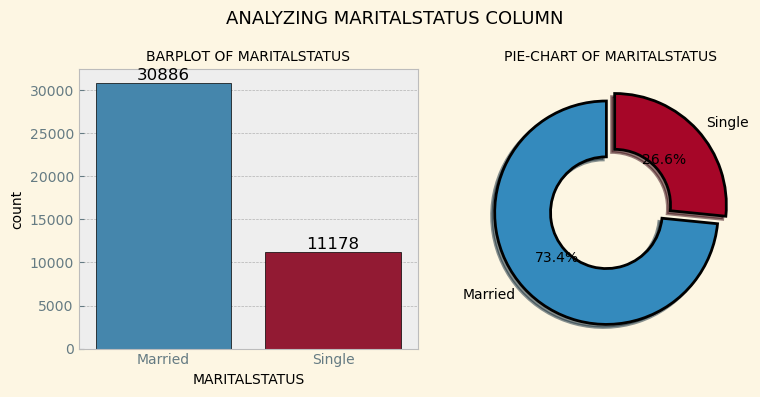

In [43]:
f, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=df, x='MARITALSTATUS',ax=ax[0], edgecolor='black')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)
ax[0].set_title("BARPLOT OF MARITALSTATUS",size=10)   
ax[1].pie(x=df['MARITALSTATUS'].value_counts(),
          labels=df['MARITALSTATUS'].value_counts().index,
         explode=[0.05, 0.05],
         autopct='%1.1f%%',
        shadow=True,
        startangle=90, 
        wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5})

ax[1].set_title("PIE-CHART OF MARITALSTATUS", size=10)

plt.suptitle("ANALYZING MARITALSTATUS COLUMN", size=13)
plt.tight_layout()
plt.show()

In [44]:
crosstab_result = pd.crosstab(df['Approved_Flag'], df['MARITALSTATUS'])
crosstab_result

MARITALSTATUS,Married,Single
Approved_Flag,,
P1,4435,473
P2,18718,6734
P3,4387,2053
P4,3346,1918


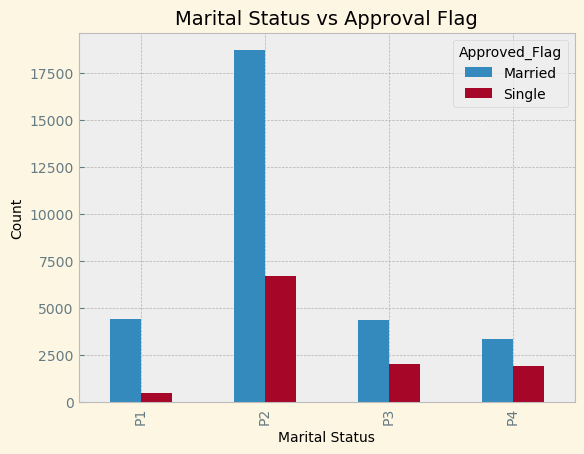

In [45]:
crosstab_result.plot(kind='bar', stacked=False)
plt.title('Marital Status vs Approval Flag', size=14)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Approved_Flag')
plt.show()

In [46]:
df[df['MARITALSTATUS'] == 'Married']['last_prod_enq2'].value_counts(normalize=True)

last_prod_enq2
ConsumerLoan    0.378748
others          0.332027
PL              0.179272
CC              0.050282
AL              0.036230
HL              0.023441
Name: proportion, dtype: float64

In [47]:
# A Consumer Loan refers to a type of loan granted to individuals for personal, family, or household use,
# rather than for business purposes.

In [48]:
df[(df['MARITALSTATUS'] == 'Single') & (df['AGE'] <25)]['last_prod_enq2'].value_counts(normalize=True)

last_prod_enq2
ConsumerLoan    0.459933
others          0.287014
PL              0.172475
CC              0.055050
AL              0.017092
HL              0.008435
Name: proportion, dtype: float64

In [49]:
df[df['MARITALSTATUS'] == 'Single']['last_prod_enq2'].value_counts(normalize=True)

last_prod_enq2
ConsumerLoan    0.427805
others          0.303990
PL              0.180354
CC              0.057434
AL              0.020934
HL              0.009483
Name: proportion, dtype: float64

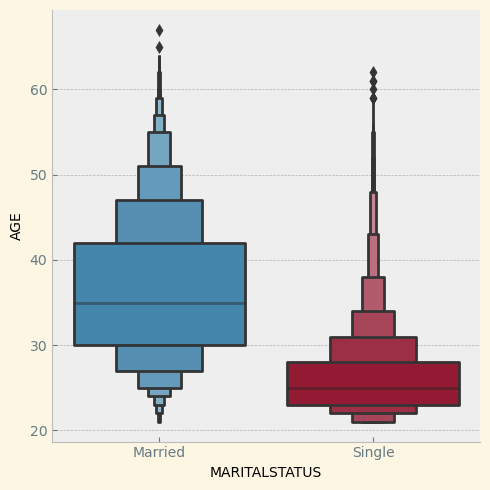

In [50]:
sns.catplot(data=df, x='MARITALSTATUS', y='AGE', kind='boxen')

In [51]:
# SUMMARY:-
#     - In the above cells, I try to compare columns like marital status age and last loan inquiry to gain insights. 
#       I want to see if loan types depend on marital status and if there are any differences based on each category. 
#     - However, I am unable to gain any insights from this comparison.

#### 2. EDUCATION

In [52]:
df['EDUCATION'].unique()

array(['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE',
       'OTHERS', 'PROFESSIONAL'], dtype=object)

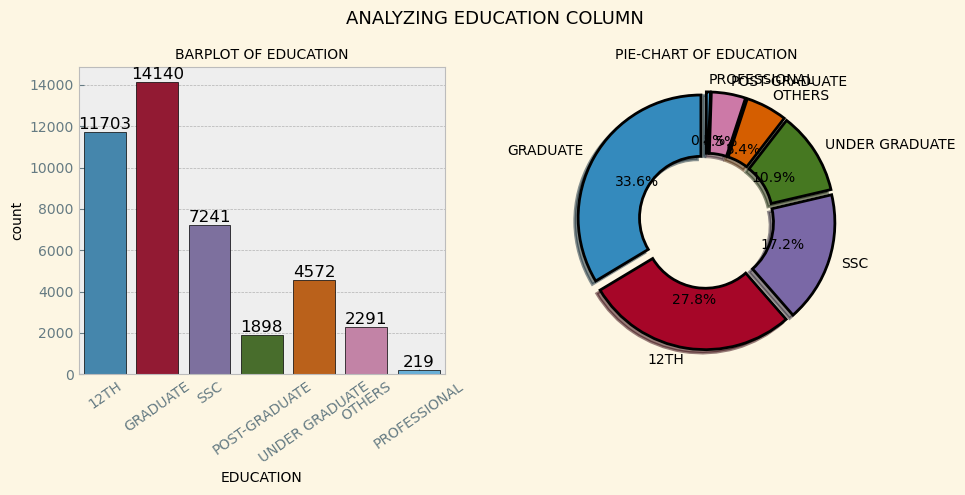

In [53]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=df, x='EDUCATION',ax=ax[0], edgecolor='black')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)
ax[0].set_title("BARPLOT OF EDUCATION",size=10)   
ax[0].set_xticklabels(df['EDUCATION'].unique(), rotation=35) 
ax[1].pie(x=df['EDUCATION'].value_counts(),
          labels=df['EDUCATION'].value_counts().index,
         explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
         autopct='%1.1f%%',
        shadow=True,
        startangle=90, 
        wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5})

ax[1].set_title("PIE-CHART OF EDUCATION", size=10)

plt.suptitle("ANALYZING EDUCATION COLUMN", size=13)
plt.tight_layout()
plt.show()

In [54]:
for i in df['Approved_Flag'].unique():
    
    print('-----Approved_Flag :- ', i)
    Edu1 = df[df['Approved_Flag'] == i]['EDUCATION'].value_counts().to_dict()
    Edu2 = df['EDUCATION'].value_counts().to_dict()
    for j in df['EDUCATION'].unique():
        print(j,":-",round((Edu1[j]/ Edu2[j])*100, 2),"%")
    print('-'*50)


-----Approved_Flag :-  P2
12TH :- 62.6 %
GRADUATE :- 58.46 %
SSC :- 62.39 %
POST-GRADUATE :- 58.69 %
UNDER GRADUATE :- 58.99 %
OTHERS :- 61.15 %
PROFESSIONAL :- 59.36 %
--------------------------------------------------
-----Approved_Flag :-  P1
12TH :- 10.18 %
GRADUATE :- 12.49 %
SSC :- 10.51 %
POST-GRADUATE :- 16.02 %
UNDER GRADUATE :- 11.64 %
OTHERS :- 13.53 %
PROFESSIONAL :- 20.09 %
--------------------------------------------------
-----Approved_Flag :-  P3
12TH :- 16.07 %
GRADUATE :- 15.11 %
SSC :- 15.25 %
POST-GRADUATE :- 13.22 %
UNDER GRADUATE :- 15.53 %
OTHERS :- 14.27 %
PROFESSIONAL :- 14.16 %
--------------------------------------------------
-----Approved_Flag :-  P4
12TH :- 11.15 %
GRADUATE :- 13.95 %
SSC :- 11.85 %
POST-GRADUATE :- 12.07 %
UNDER GRADUATE :- 13.85 %
OTHERS :- 11.04 %
PROFESSIONAL :- 6.39 %
--------------------------------------------------


In [55]:
Edu1 = df[(df['Approved_Flag'] == 'P1') | (df['Approved_Flag'] == 'P2')]['EDUCATION'].value_counts().to_dict()
Edu2 = df['EDUCATION'].value_counts().to_dict()
for j in df['EDUCATION'].unique():
    print(j,":-",round((Edu1[j]/ Edu2[j])*100, 2),"%")

12TH :- 72.78 %
GRADUATE :- 70.95 %
SSC :- 72.9 %
POST-GRADUATE :- 74.71 %
UNDER GRADUATE :- 70.63 %
OTHERS :- 74.68 %
PROFESSIONAL :- 79.45 %


In [56]:
Edu1 = df[(df['Approved_Flag'] == 'P3') | (df['Approved_Flag'] == 'P4')]['EDUCATION'].value_counts().to_dict()
Edu2 = df['EDUCATION'].value_counts().to_dict()
for j in df['EDUCATION'].unique():
    print(j,":-",round((Edu1[j]/ Edu2[j])*100, 2),"%")

12TH :- 27.22 %
GRADUATE :- 29.05 %
SSC :- 27.1 %
POST-GRADUATE :- 25.29 %
UNDER GRADUATE :- 29.37 %
OTHERS :- 25.32 %
PROFESSIONAL :- 20.55 %


In [57]:
# OBSERVATION:
#      -  12th, chances of getting a loan approved flag as 'P1' or 'P2' is 72.28%.
#      -  GRADUATE, chances of getting a loan approved flag as 'P1' or 'P2' is 70.95%.
#      -  SSC, chances of getting a loan approved flag as 'P1' or 'P2' is 72.9%.
#      -  POST-GRADUATE, chances of getting a loan approved flag as 'P1' or 'P2' is 74.71%.
#      -  UNDER-GRADUATE, chances of getting a loan approved flag as 'P1' or 'P2' is 70.63%.
#      -  PROFESSIONAL, chances of getting a loan approved flag as 'P1' or 'P2' is 74.68%.
#      -  OTHERS, chances of getting a loan approved flag as 'P1' or 'P2' is 79.45%.

# CONCLUSION:-
#      - If the person is educated above a graduate, then he has a high chance of getting his loan approved.

#IMPROVEMENT:-
#      -There are too many rare values in education columns, so we need to handle it while preprocessing.
#      -Education acts as a level, so while preprocessing we can represent it using numerical codes like 1, 2, 3, 4, 5.

#### 3. GENDER

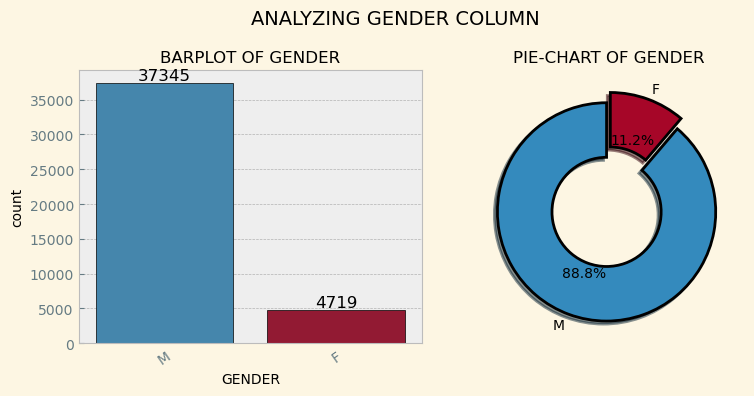

In [58]:
f, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=df, x='GENDER',ax=ax[0], edgecolor='black')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)
ax[0].set_title("BARPLOT OF GENDER",size=12)   
ax[0].set_xticklabels(df['GENDER'].unique(), rotation=35) 
ax[1].pie(x=df['GENDER'].value_counts(),
          labels=df['GENDER'].value_counts().index,
         explode=[0.05, 0.05],
         autopct='%1.1f%%',
        shadow=True,
        startangle=90, 
        wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5})

ax[1].set_title("PIE-CHART OF GENDER", size=12)

plt.suptitle("ANALYZING GENDER COLUMN", size=14)
plt.tight_layout()
plt.show()

In [59]:
crosstab_result = pd.crosstab(df['Approved_Flag'], df['GENDER'])
crosstab_result

GENDER,F,M
Approved_Flag,,
P1,451,4457
P2,2946,22506
P3,744,5696
P4,578,4686


In [60]:
for i in df['Approved_Flag'].unique():
    
    print('-----Approved_Flag :- ', i)
    Edu1 = df[df['Approved_Flag'] == i]['GENDER'].value_counts().to_dict()
    Edu2 = df['GENDER'].value_counts().to_dict()
    for j in df['GENDER'].unique():
        print(j,":-",round((Edu1[j]/ Edu2[j])*100, 2),"%")
    print('-'*50)


-----Approved_Flag :-  P2
M :- 60.27 %
F :- 62.43 %
--------------------------------------------------
-----Approved_Flag :-  P1
M :- 11.93 %
F :- 9.56 %
--------------------------------------------------
-----Approved_Flag :-  P3
M :- 15.25 %
F :- 15.77 %
--------------------------------------------------
-----Approved_Flag :-  P4
M :- 12.55 %
F :- 12.25 %
--------------------------------------------------


In [61]:
Edu1 = df[(df['Approved_Flag'] == 'P1') | (df['Approved_Flag'] == 'P2')]['GENDER'].value_counts().to_dict()
Edu2 = df['GENDER'].value_counts().to_dict()
for j in df['GENDER'].unique():
    print(j,":-",round((Edu1[j]/ Edu2[j])*100, 2),"%")

M :- 72.2 %
F :- 71.99 %


In [62]:
# OBSERATION:-
#     1. MALE, chances of getting a loan approved flag as 'P1' or 'P2' is 72.2%. (~72%).
#     2. fEMALE, chances of getting a loan approved flag as 'P1' or 'P2' is 71.99% (~72%).
    
# CONCLUSION:-
#     - So from this, we can conclude that gender is not playing an important role in deciding whether their will loan gets approved.

#### 4. last_prod_enq2

In [63]:
df['last_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'AL', 'CC', 'others', 'HL'], dtype=object)

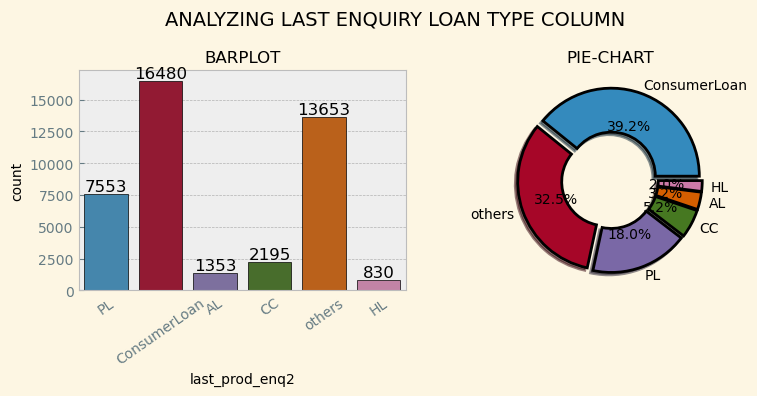

In [64]:
f, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=df, x='last_prod_enq2',ax=ax[0], edgecolor='black')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)
ax[0].set_title("BARPLOT",size=12)   
ax[0].set_xticklabels(df['last_prod_enq2'].unique(), rotation=35) 
ax[1].pie(x=df['last_prod_enq2'].value_counts(),
          labels=df['last_prod_enq2'].value_counts().index,
         explode=[0.05]*len(df['last_prod_enq2'].unique()),
         autopct='%1.1f%%',
        shadow=True, 
        wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5})

ax[1].set_title("PIE-CHART", size=12)

plt.suptitle("ANALYZING LAST ENQUIRY LOAN TYPE COLUMN", size=14)
plt.tight_layout()

plt.show()

#### 5. first_prod_enq2

In [65]:
df['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

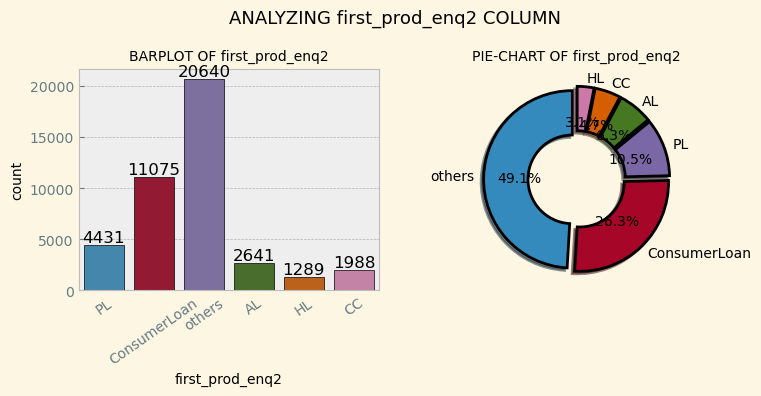

In [66]:
f, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=df, x='first_prod_enq2',ax=ax[0], edgecolor='black')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)
ax[0].set_title("BARPLOT OF first_prod_enq2",size=10)   
ax[0].set_xticklabels(df['first_prod_enq2'].unique(), rotation=35) 
ax[1].pie(x=df['first_prod_enq2'].value_counts(),
          labels=df['first_prod_enq2'].value_counts().index,
         explode=[0.05]*len(df['first_prod_enq2'].unique()),
         autopct='%1.1f%%',
        shadow=True,
        startangle=90, 
        wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5})

ax[1].set_title("PIE-CHART OF first_prod_enq2", size=10)

plt.suptitle("ANALYZING first_prod_enq2 COLUMN", size=13)
plt.tight_layout()
plt.show()

#### CHI-SQUARE TEST FOR CATEGORICAL COLUMNS

In [67]:
# CHI-SQUARE TEST
from scipy.stats import chi2_contingency
print("Using Chi Square to determine whether is need to drop any column?")
print()
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print("    ",i," :- ", pval)    

Using Chi Square to determine whether is need to drop any column?

     MARITALSTATUS  :-  3.578180861038862e-233
     EDUCATION  :-  2.6942265249737532e-30
     GENDER  :-  1.907936100186563e-05
     last_prod_enq2  :-  0.0
     first_prod_enq2  :-  7.84997610555419e-287


In [68]:
# As the pVal of every column is less than 0.05, so we need to keep all of them.

### DETAILED ANALYSIS OF NUMERICAL COLUMNS 

In [69]:
# VIF FOR NUMERICAL COLUMNS:-
numerical_columns = []
for i in df.columns:
    if df[i].dtype != "object" and i != 'PROSPECTID':
        numerical_columns.append(i)

In [70]:
len(numerical_columns)

72

In [71]:
# As there are total of 72 numerical columns, and analyzing all the columns is time consuming process. 
# So instead of this we will  drop all the column which show multi-collinearlity. 
# To do this we will use VIF-variance_inflation_factor


In [72]:
vif_data = df[numerical_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
columns_index = 0

for i in range(0, total_columns):
    vif_value = variance_inflation_factor(vif_data, columns_index)
    print(i,". ", numerical_columns[i], "->", vif_value)
    
    if vif_value <= 6:
        columns_to_be_kept.append(numerical_columns[i])
        columns_index = columns_index + 1
    else:
        vif_data = vif_data.drop([numerical_columns[i]], axis = 1)

0 .  Total_TL -> inf
1 .  Tot_Closed_TL -> inf
2 .  Tot_Active_TL -> 11.320180023967996
3 .  Total_TL_opened_L6M -> 8.363698035000327
4 .  Tot_TL_closed_L6M -> 6.520647877790928
5 .  pct_tl_open_L6M -> 5.149501618212625
6 .  pct_tl_closed_L6M -> 2.611111040579735
7 .  pct_active_tl -> inf
8 .  pct_closed_tl -> 1788.7926256209232
9 .  Total_TL_opened_L12M -> 8.601028256477228
10 .  Tot_TL_closed_L12M -> 3.8328007921530785
11 .  pct_tl_open_L12M -> 6.099653381646739
12 .  pct_tl_closed_L12M -> 5.5813520096427585
13 .  Tot_Missed_Pmnt -> 1.985584353098778
14 .  Auto_TL -> inf
15 .  CC_TL -> 4.809538302819343
16 .  Consumer_TL -> 23.270628983464636
17 .  Gold_TL -> 30.595522588100053
18 .  Home_TL -> 4.3843464059655854
19 .  PL_TL -> 3.0646584155234238
20 .  Secured_TL -> 2.898639771299252
21 .  Unsecured_TL -> 4.377876915347324
22 .  Other_TL -> 2.2078535836958433
23 .  Age_Oldest_TL -> 4.916914200506864
24 .  Age_Newest_TL -> 5.214702030064725
25 .  time_since_recent_payment -> 3.3861625

In [73]:
len(columns_to_be_kept)

39

In [74]:
columns_to_be_kept

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'pct_currentBal_all_TL',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

### CHECKING ANOVA FOR THE COLUMNS TO BE KEPT

In [75]:
columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])
    
    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']
    
    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)
    
    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [76]:
len(columns_to_be_kept_numerical)

37

In [77]:
columns_to_be_kept_numerical

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

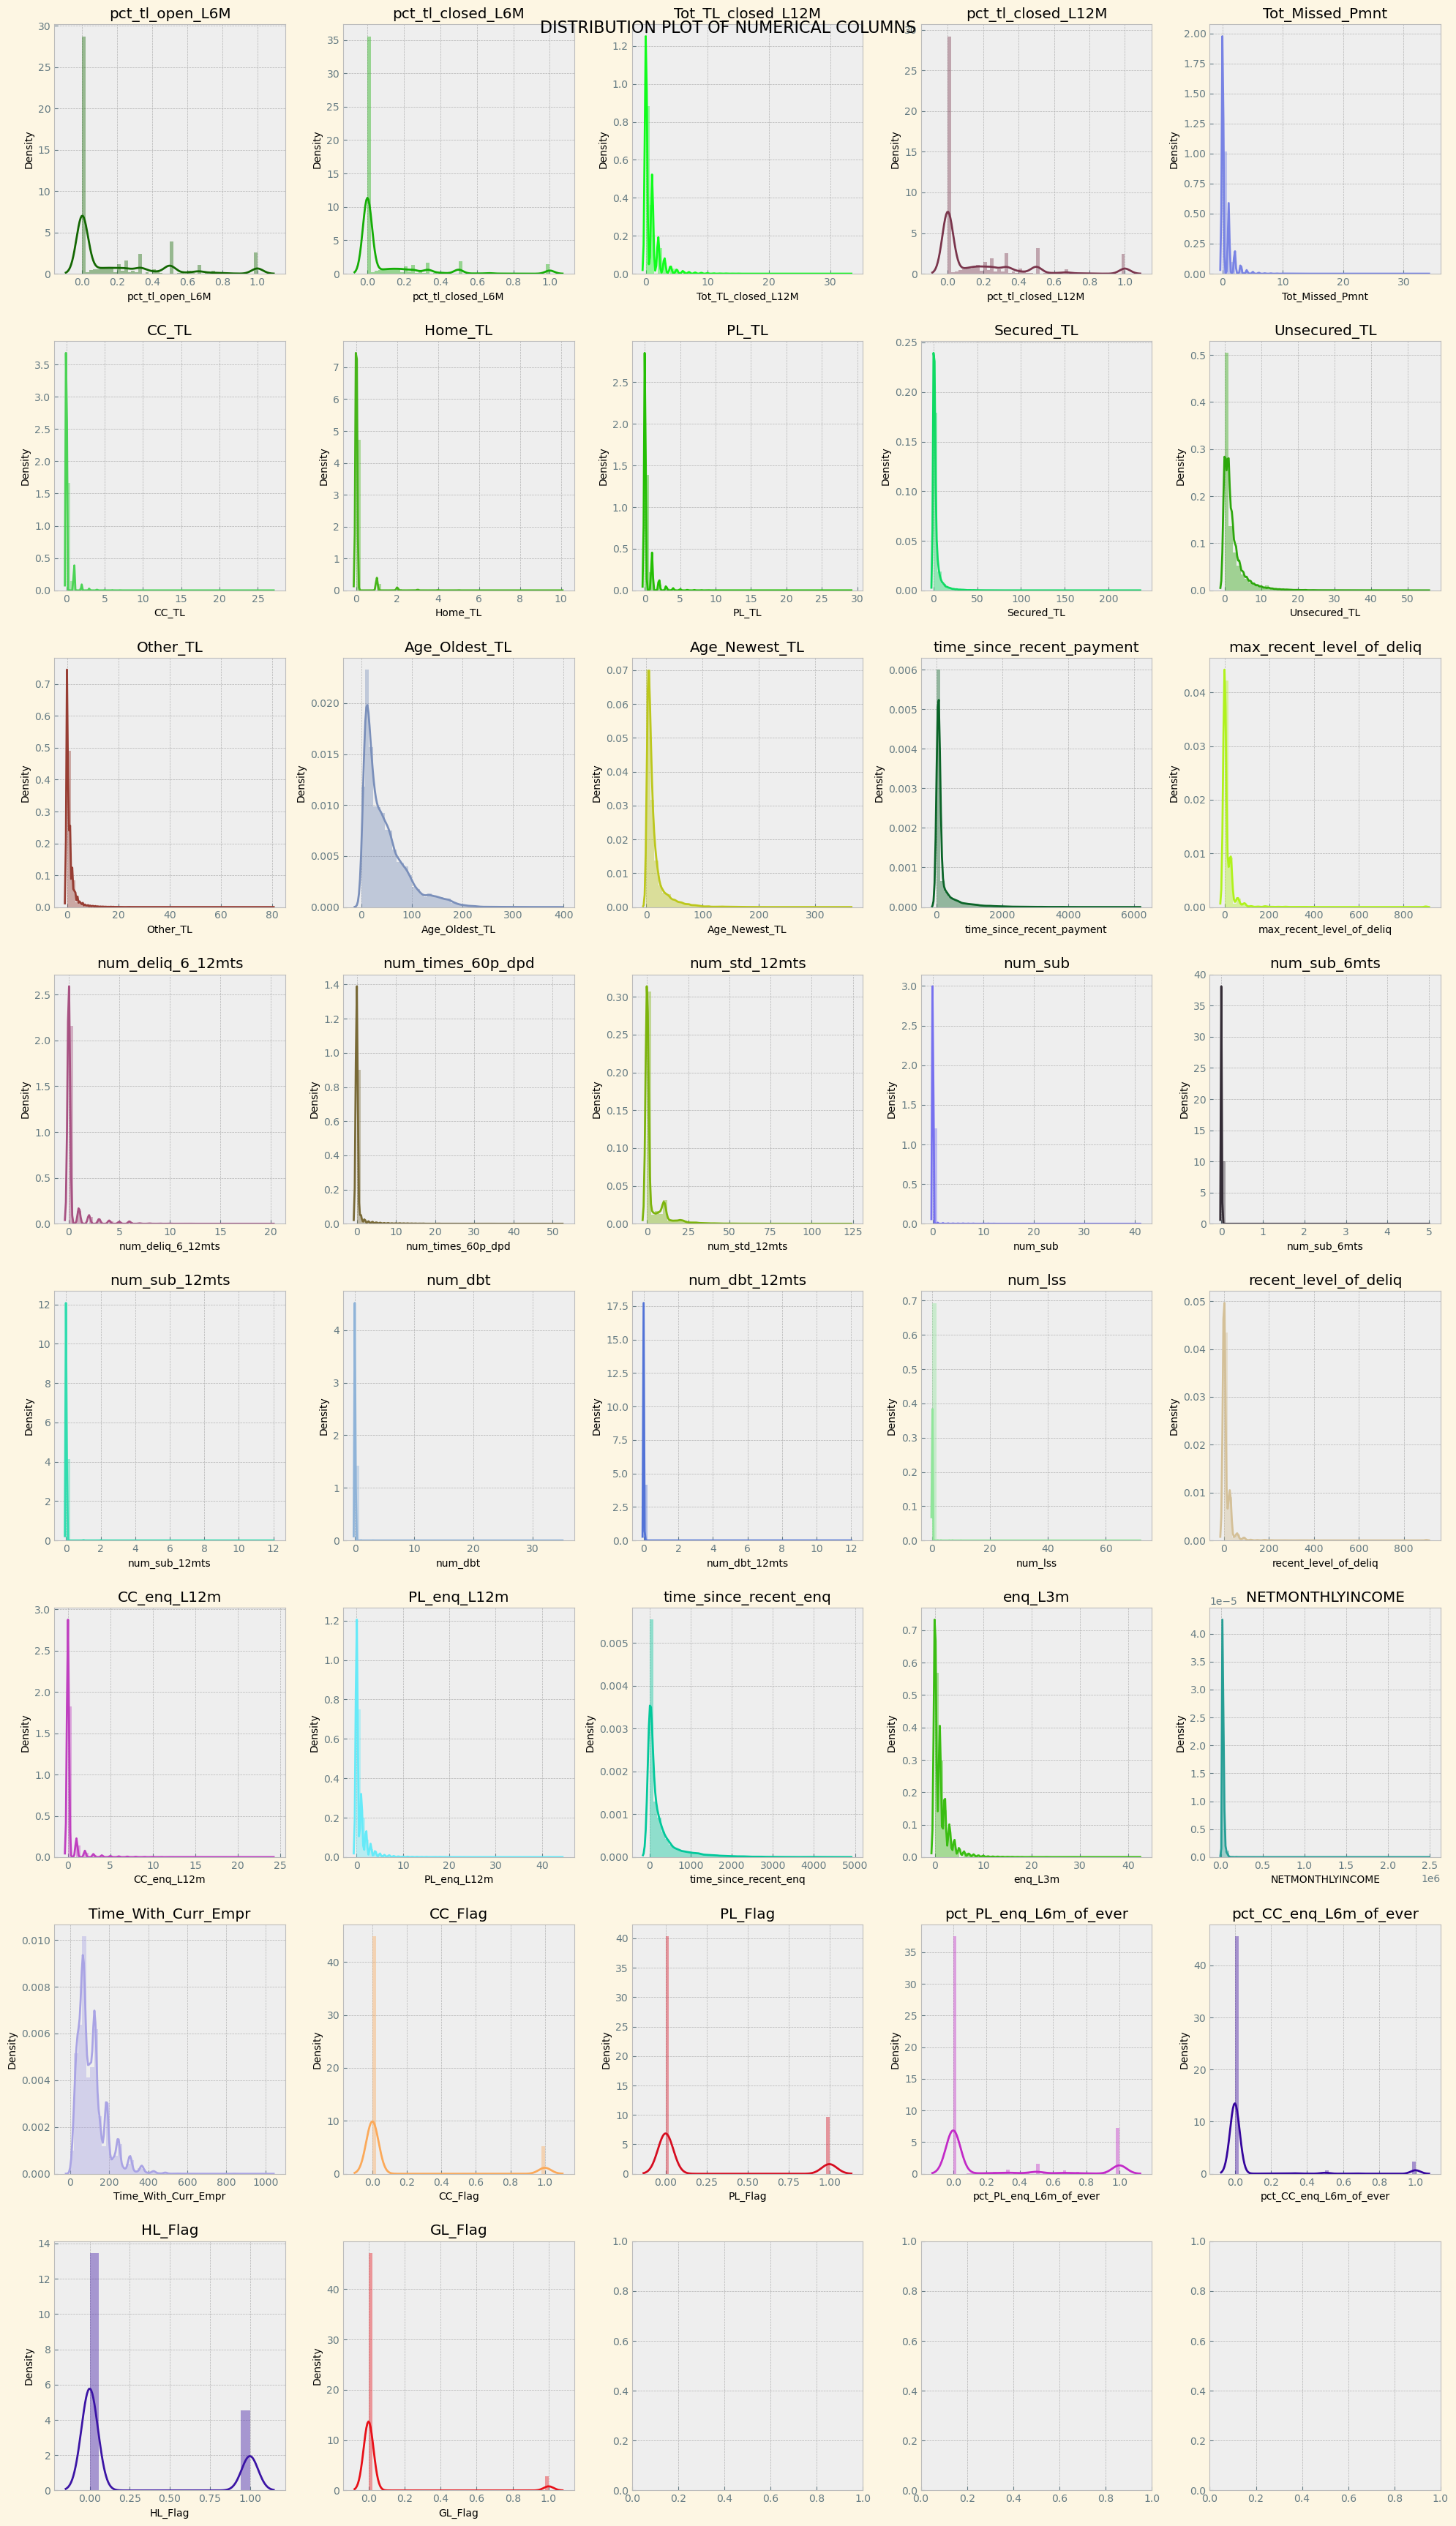

In [78]:
f, ax = plt.subplots(8, 5, figsize=(20, 35)) 
ax = ax.flatten()  

for i in range(37):
    random_color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) 
    
    sns.distplot(df[columns_to_be_kept_numerical[i]], ax=ax[i], color=random_color)  
    ax[i].set_title(columns_to_be_kept_numerical[i])
plt.suptitle("DISTRIBUTION PLOT OF NUMERICAL COLUMNS", size=16)
plt.tight_layout()
plt.show()


In [81]:
already_scaled_numcol = ["pct_tl_closed_L12M", "pct_tl_open_L6M", "pct_tl_closed_L6M", "Tot_TL_closed_L12M", "pct_CC_enq_L6m_of_ever", "pct_PL_enq_L6m_of_ever", "PL_Flag", "CC_Flag", "HL_Flag", "GL_Flag"]

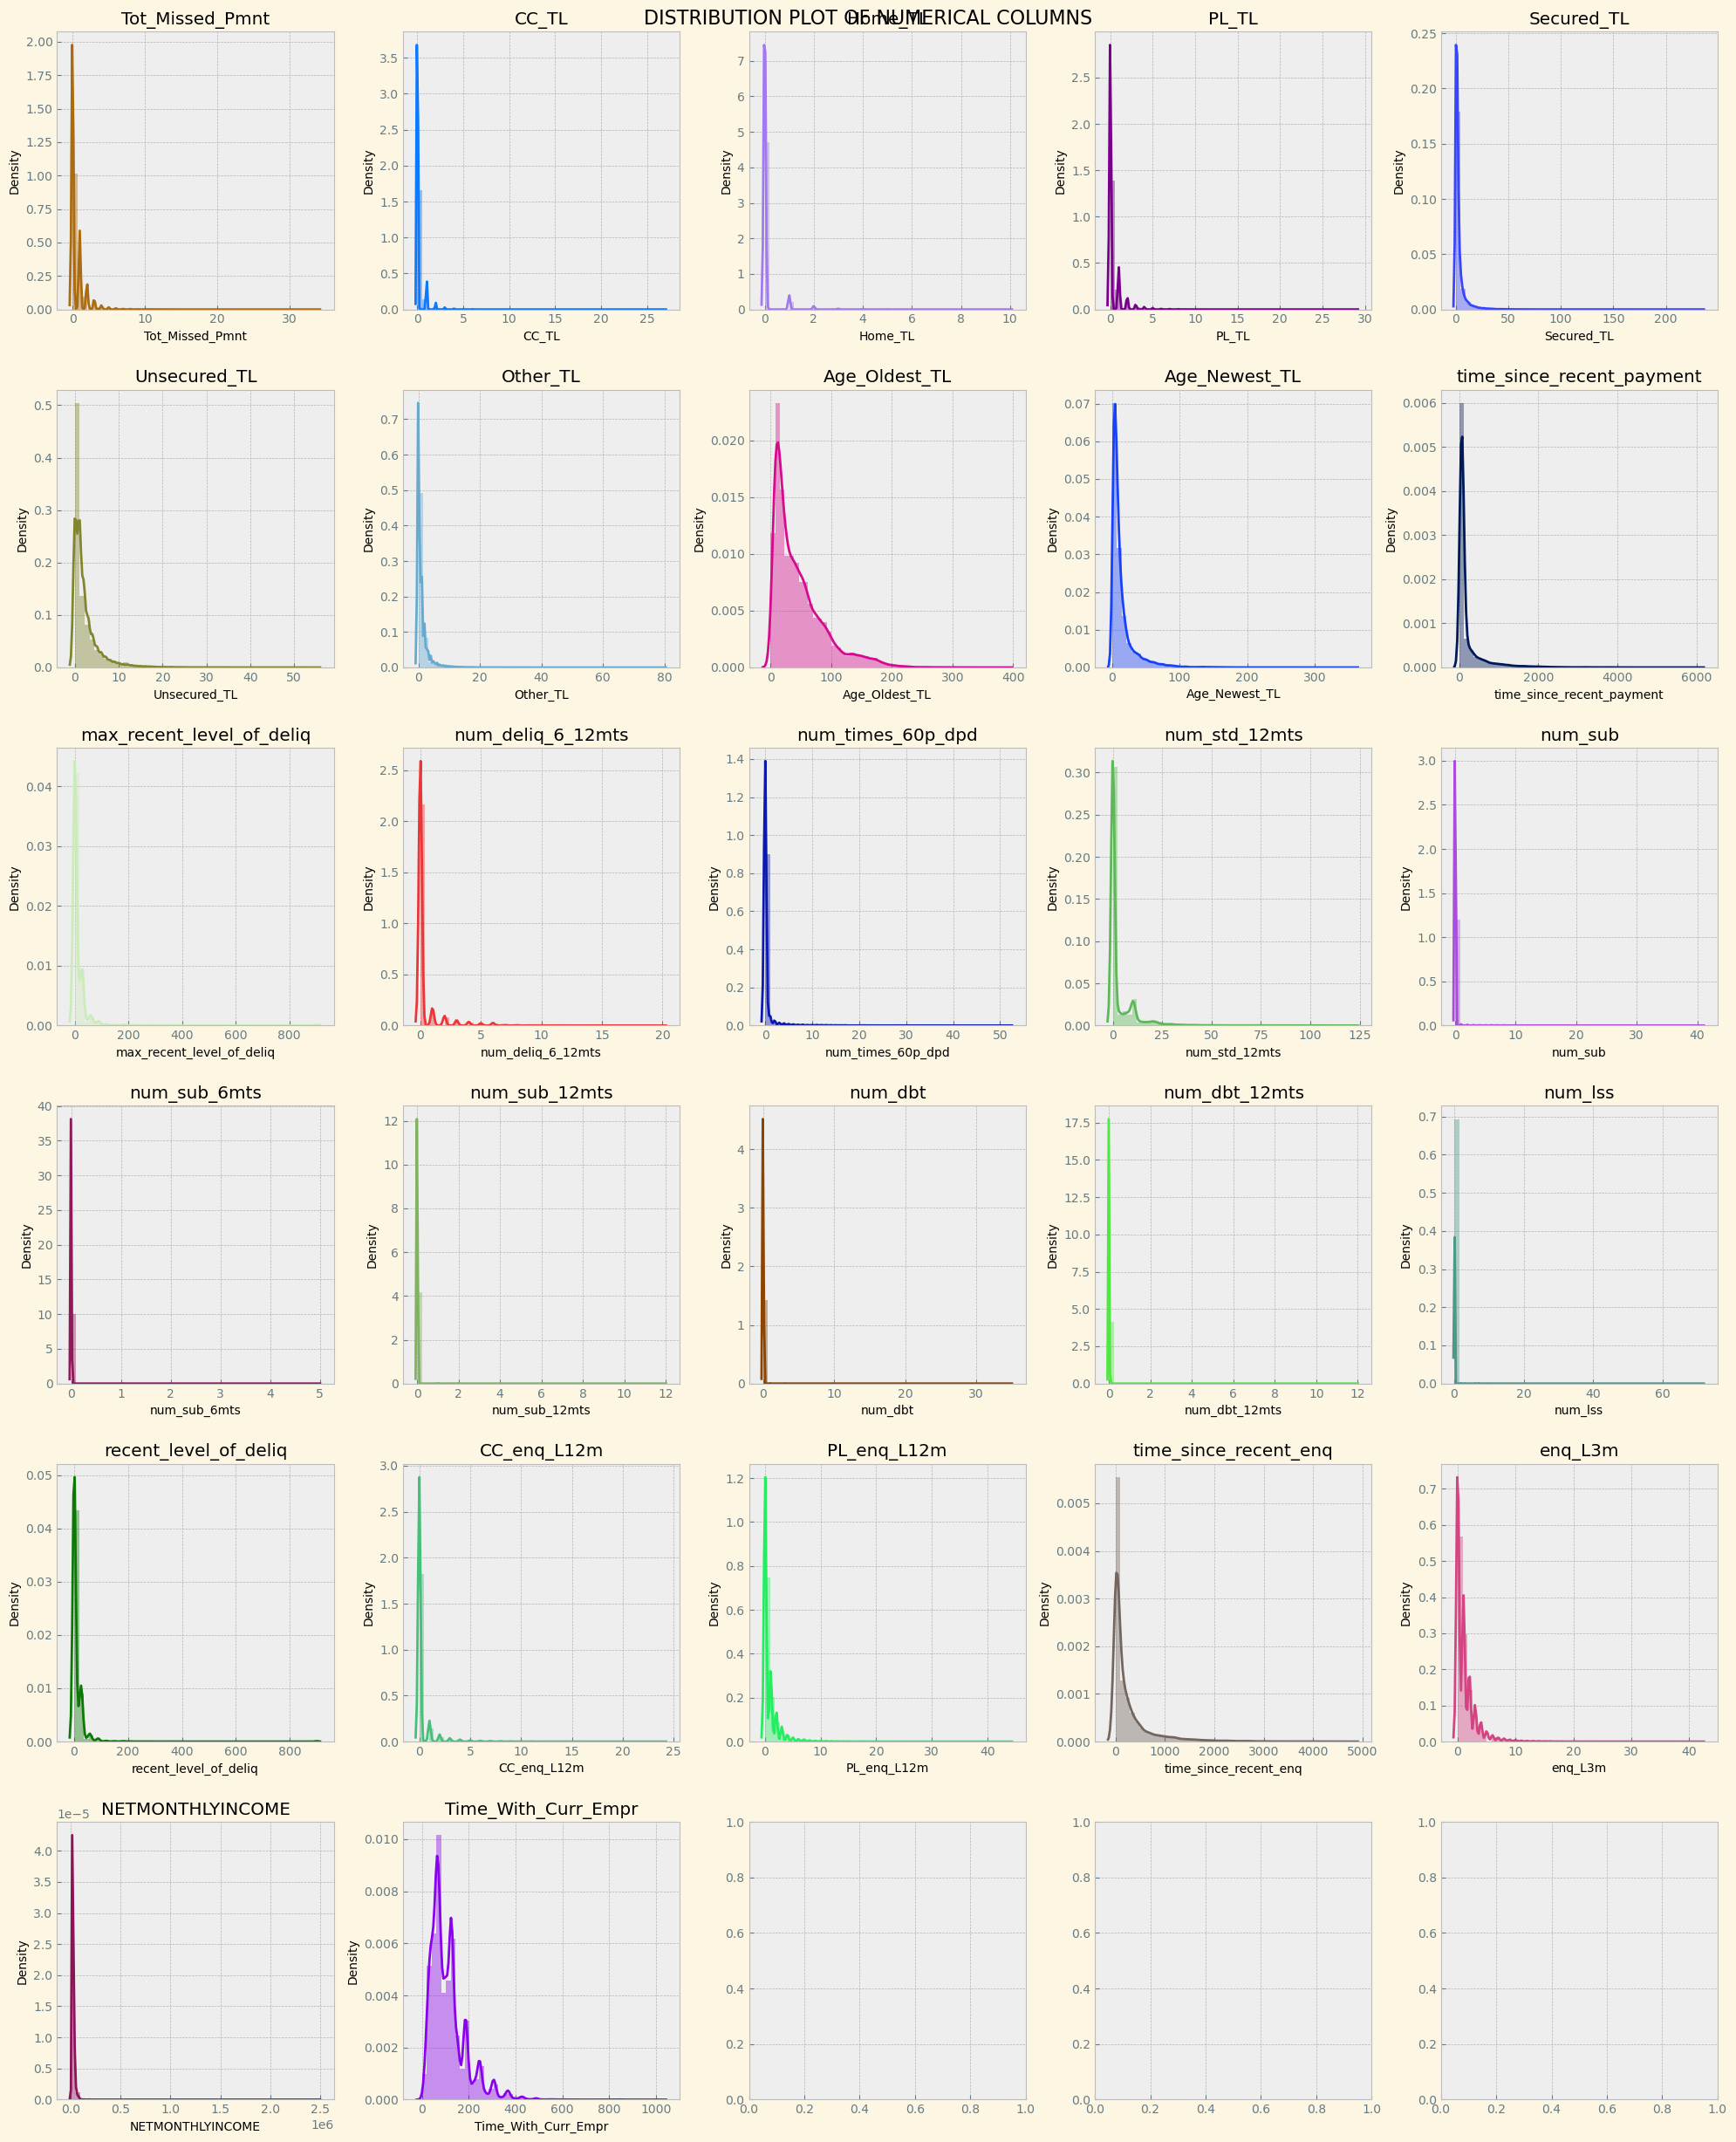

In [82]:
f, ax = plt.subplots(6, 5, figsize=(20, 25)) 
ax = ax.flatten()  
count = 0
for i in range(37):
    if columns_to_be_kept_numerical[i] not in list(already_scaled_numcol):
        random_color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) 
        sns.distplot(df[columns_to_be_kept_numerical[i]], ax=ax[count], color=random_color)  
        ax[count].set_title(columns_to_be_kept_numerical[i])
        count += 1
plt.suptitle("DISTRIBUTION PLOT OF NUMERICAL COLUMNS", size=16)
plt.tight_layout()
plt.show()


#### ANALYZING TOTAL MISSED PAYMENT

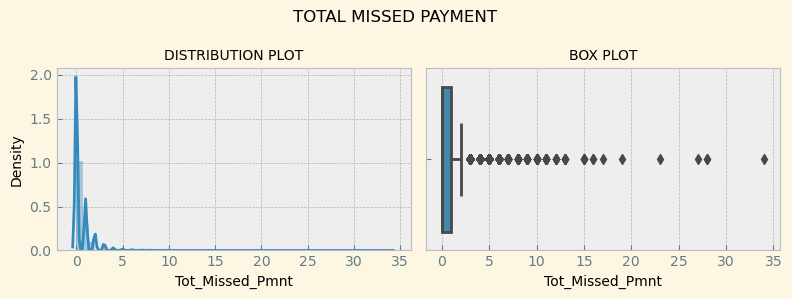

In [83]:
f, ax = plt.subplots(1, 2, figsize=(8, 3)) 

sns.distplot(df['Tot_Missed_Pmnt'], ax=ax[0])
ax[0].set_title("DISTRIBUTION PLOT", size=10)

sns.boxplot(data=df, x='Tot_Missed_Pmnt', ax=ax[1])
ax[1].set_title("BOX PLOT", size=10)

plt.suptitle("TOTAL MISSED PAYMENT",size=12)
plt.tight_layout()
plt.show()

In [84]:
df['Tot_Missed_Pmnt'].describe()

count    42064.000000
mean         0.525746
std          1.106442
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         34.000000
Name: Tot_Missed_Pmnt, dtype: float64

In [85]:
df[df['Tot_Missed_Pmnt'] > 1]["Tot_Missed_Pmnt"].shape

(4830,)

In [86]:
Q1 = df['Tot_Missed_Pmnt'].quantile(0.25)
Q3 = df['Tot_Missed_Pmnt'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['Tot_Missed_Pmnt'] <lower_bound) | (df['Tot_Missed_Pmnt'] > upper_bound)]

In [87]:
outliers.shape

(2023, 79)

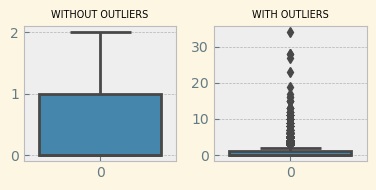

In [88]:
df_no_outliers = df[(df['Tot_Missed_Pmnt'] >= lower_bound) & (df['Tot_Missed_Pmnt'] <= upper_bound)]

fig, axs = plt.subplots(1, 2, figsize = (4, 2))

sns.boxplot(data=df_no_outliers['Tot_Missed_Pmnt'], ax = axs[0])
axs[0].set_title("WITHOUT OUTLIERS", size=7)

sns.boxplot(data=df['Tot_Missed_Pmnt'], ax = axs[1])
axs[1].set_title("WITH OUTLIERS",  size=7)

plt.tight_layout()
plt.show()

In [89]:
print("The chance of value present in outlier but still getting first preference is :- ", round(df[(df['Tot_Missed_Pmnt'] > 2.5) & (df['Approved_Flag'] == 'P1')].shape[0]/df[df['Tot_Missed_Pmnt'] > 2.5].shape[0]*100, 2))
print("The chance of value present in outlier but still getting second preference is :- ", round(df[(df['Tot_Missed_Pmnt'] > 2.5) & (df['Approved_Flag'] == 'P2')].shape[0]/df[df['Tot_Missed_Pmnt'] > 2.5].shape[0]*100, 2))

The chance of value present in outlier but still getting first preference is :-  26.05
The chance of value present in outlier but still getting second preference is :-  44.34


In [90]:
# As total missed payment create negative impact on credit score but still values greater that 2.5 not creating any negative
# impact so there might be chance that the other parameter are performing well in this case so keeping all this instances as it
# is will be the better option for us.

#### ANALYZING CC_TL, HOME_TL, PL_TL, OTHER_TL

In [91]:
df['CC_TL'].describe()

count    42064.000000
mean         0.145921
std          0.549314
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         27.000000
Name: CC_TL, dtype: float64

In [92]:
df['Home_TL'].describe()

count    42064.000000
mean         0.076241
std          0.358582
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: Home_TL, dtype: float64

In [93]:
df['PL_TL'].describe()

count    42064.000000
mean         0.328000
std          0.916368
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         29.000000
Name: PL_TL, dtype: float64

In [94]:
df['Other_TL'].describe()

count    42064.000000
mean         1.116489
std          2.486801
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         80.000000
Name: Other_TL, dtype: float64

#### Checking for outlier in Other_TL

In [95]:
Q1 = df['Other_TL'].quantile(0.25)
Q3 = df['Other_TL'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("LOWER BOUND :-", lower_bound)
print("UPPER BOUND :-", upper_bound)

print("The chance of value present in outlier but still getting first preference is :- ", round(df[(df['Other_TL'] > upper_bound) & (df['Approved_Flag'] == 'P1')].shape[0]/df[df['Other_TL'] >upper_bound].shape[0]*100, 2))
print("The chance of value present in outlier but still getting second preference is :- ", round(df[(df['Other_TL'] > upper_bound) & (df['Approved_Flag'] == 'P2')].shape[0]/df[df['Other_TL'] > upper_bound].shape[0]*100, 2))

LOWER BOUND :- -1.5
UPPER BOUND :- 2.5
The chance of value present in outlier but still getting first preference is :-  29.57
The chance of value present in outlier but still getting second preference is :-  51.07


In [96]:
Q1 = df['PL_TL'].quantile(0.25)
Q3 = df['PL_TL'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("LOWER BOUND :-", lower_bound)
print("UPPER BOUND :-", upper_bound)

print("The chance of value present in outlier but getting first preference is :- ", round(df[(df['PL_TL'] > upper_bound) & (df['Approved_Flag'] == 'P1')].shape[0]/df[df['PL_TL'] >upper_bound].shape[0]*100, 2))
print("The chance of value present in outlier but getting second preference is :- ", round(df[(df['PL_TL'] > upper_bound) & (df['Approved_Flag'] == 'P2')].shape[0]/df[df['PL_TL'] > upper_bound].shape[0]*100, 2))
print("The chance of value present in outlier but getting third preference is :- ", round(df[(df['PL_TL'] > upper_bound) & (df['Approved_Flag'] == 'P3')].shape[0]/df[df['PL_TL'] >upper_bound].shape[0]*100, 2))
print("The chance of value present in outlier but getting last preference is :- ", round(df[(df['PL_TL'] > upper_bound) & (df['Approved_Flag'] == 'P4')].shape[0]/df[df['PL_TL'] > upper_bound].shape[0]*100, 2))

LOWER BOUND :- 0.0
UPPER BOUND :- 0.0
The chance of value present in outlier but getting first preference is :-  18.88
The chance of value present in outlier but getting second preference is :-  51.62
The chance of value present in outlier but getting third preference is :-  13.91
The chance of value present in outlier but getting last preference is :-  15.59


In [97]:

Q1 = df['Home_TL'].quantile(0.25)
Q3 = df['Home_TL'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("LOWER BOUND :-", lower_bound)
print("UPPER BOUND :-", upper_bound)

print("The chance of value present in outlier and getting first preference is :- ", round(df[(df['Home_TL'] > upper_bound) & (df['Approved_Flag'] == 'P1')].shape[0]/df[df['Home_TL'] >upper_bound].shape[0]*100, 2))
print("The chance of value present in outlier and getting second preference is :- ", round(df[(df['Home_TL'] > upper_bound) & (df['Approved_Flag'] == 'P2')].shape[0]/df[df['Home_TL'] > upper_bound].shape[0]*100, 2))
print("The chance of value present in outlier and getting thrid preference is :- ", round(df[(df['Home_TL'] > upper_bound) & (df['Approved_Flag'] == 'P3')].shape[0]/df[df['Home_TL'] >upper_bound].shape[0]*100, 2))
print("The chance of value present in outlier and getting last preference is :- ", round(df[(df['Home_TL'] > upper_bound) & (df['Approved_Flag'] == 'P4')].shape[0]/df[df['Home_TL'] > upper_bound].shape[0]*100, 2))

LOWER BOUND :- 0.0
UPPER BOUND :- 0.0
The chance of value present in outlier and getting first preference is :-  35.92
The chance of value present in outlier and getting second preference is :-  48.32
The chance of value present in outlier and getting thrid preference is :-  9.54
The chance of value present in outlier and getting last preference is :-  6.22


In [98]:
# From above few example we can conclude that the presence of outlier is good for our model because we fail to prove that 
# outliers are not having any role in our dataset.
# So it is good for our model if we keep outliers as it will give dynamic view to our model.

In [99]:
# As all other parameters also show same type of distribution so in this case we will use LOG TRANSFORMATION for scaling

In [100]:
categorical_columns = []
for i in df.columns:
    if df[i].dtype == 'object' and i != 'Approved_Flag':
        print(i)
        categorical_columns.append(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2


In [101]:
# PIPELINE OVERVIEW :-

# MARITALSTATUS     -->"Married"->1 or "Single"->0
# EDUCATION         -->LevelEncoding
# GENDER            -->OneHotEncoding
# last_prod_enq2    -->rare_encoding, onehotencoding
# first_prod_enq2   -->rare_encoding, onehotencoding
# pct_tl_open_L6M, pct_tl_closed_L6M, Tot_TL_closed_L12M, pct_CC_enq_L6m_of_ever, pct_PL_enq_L6m_of_ever, PL_Flag, CC_Flag, HL_Flag, GL_Flag --> No Scaling
# all other numerical Columns -->Log Transformation

In [102]:
features = columns_to_be_kept_numerical + ['MARITALSTATUS','EDUCATION','GENDER','last_prod_enq2','first_prod_enq2','Approved_Flag']

In [103]:
len(features)

43

In [104]:
df = df[features]
df.shape

(42064, 43)

In [80]:
df.to_csv("Data//FINAL.csv")